In [28]:
%reload_ext autoreload
%autoreload 2

from workflow.scripts import settings
from trialexp.process.pyphotometry.utils import import_ppd
from pathlib import Path
import matplotlib.pylab as plt
import plotly.express as px
import tmac.models as tm
import tmac.preprocessing as tp
from scipy import signal
import numpy as np 

In [2]:
(Path(settings.debug_folder)/'pyphotometry')

PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-06-01-144336/pyphotometry')

In [3]:
photo_fn = next((Path(settings.debug_folder)/'pyphotometry').glob('*.ppd'))
photo_fn

PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-06-01-144336/pyphotometry/TT004-2023-06-01-144316.ppd')

In [4]:
data_photometry = import_ppd(photo_fn)
green = data_photometry['analog_1']
red = data_photometry['analog_2']

In [40]:
def correct_photoblench_filter(x, high_pass, low_pass, sampling_rate):
    #use a bandpass filter to correct for noise and photobleaching
    b, a = signal.butter(2, np.array([low_pass])/(0.5*sampling_rate), 'low')
    
    # remove the baseline but keep a mean
    baseline = signal.filtfilt(b,a,x)
    
    x = x/baseline
    
#     #remove the high freq artifact
#     b, a = signal.butter(2, np.array([high_pass])/(0.5*sampling_rate), 'high')
    
#     x = signal.filtfilt(b,a,x)
    return x

In [41]:
red_corrected = correct_photoblench_filter(red, 0.1, 20, 1000)
green_corrected = correct_photoblench_filter(green, 0.1, 20, 1000)

(0.0, 600000.0)

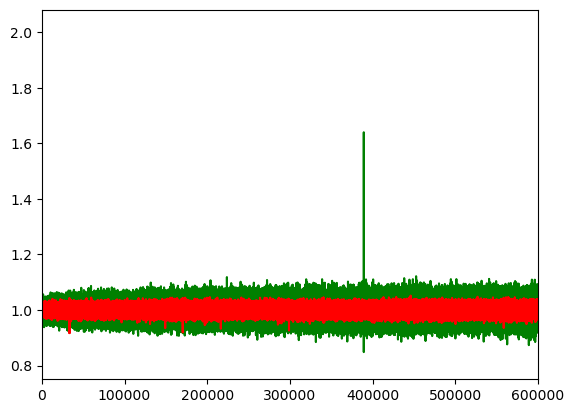

In [42]:
Fs= 1000
plt.plot(green_corrected,color='g')
plt.plot(red_corrected, color='r')
plt.xlim([0,60*10*Fs])

In [31]:
trained_variables = tm.tmac_ac(red_corrected, green_corrected)


In [32]:
trained_variables

{'a': array([[10871.81363007],
        [12579.24504418],
        [14096.70878022],
        ...,
        [ 7170.08880593],
        [ 7935.00445068],
        [ 9234.99654192]]),
 'm': array([[-1198.63992099],
        [-1222.29020309],
        [-1169.35988826],
        ...,
        [ -972.53475619],
        [-1037.48875447],
        [-1124.94455784]]),
 'variance_r_noise': array([0.44705994]),
 'variance_g_noise': array([27.69922834]),
 'variance_a': array([7.19554578e+09]),
 'length_scale_a': array([14.7091945]),
 'variance_m': array([1845235.01797789]),
 'length_scale_m': array([8.92840361])}

(0.0, 600000.0)

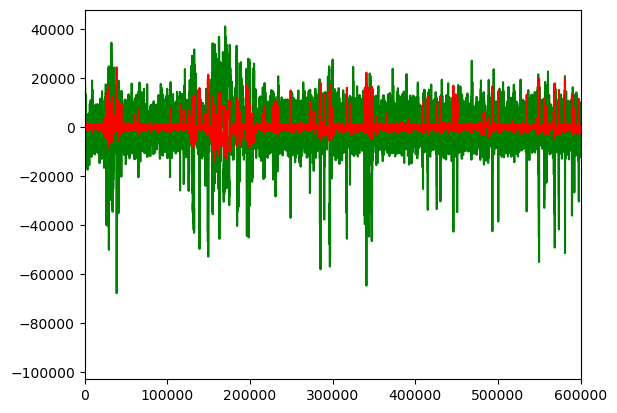

In [33]:
plt.plot(trained_variables['a'], color='green')
plt.plot(trained_variables['m'], color='red')
plt.xlim([0,60*10*Fs])

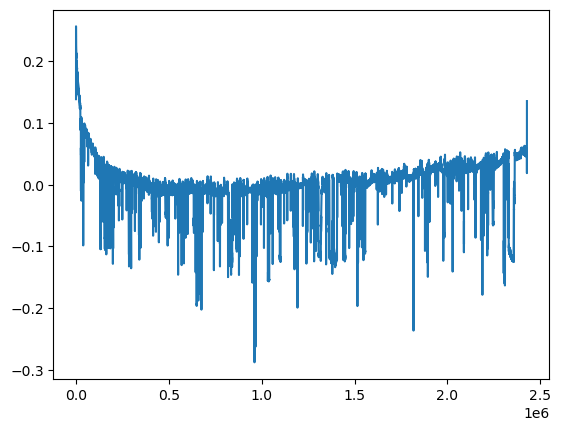